# Logisitc Regression assignment

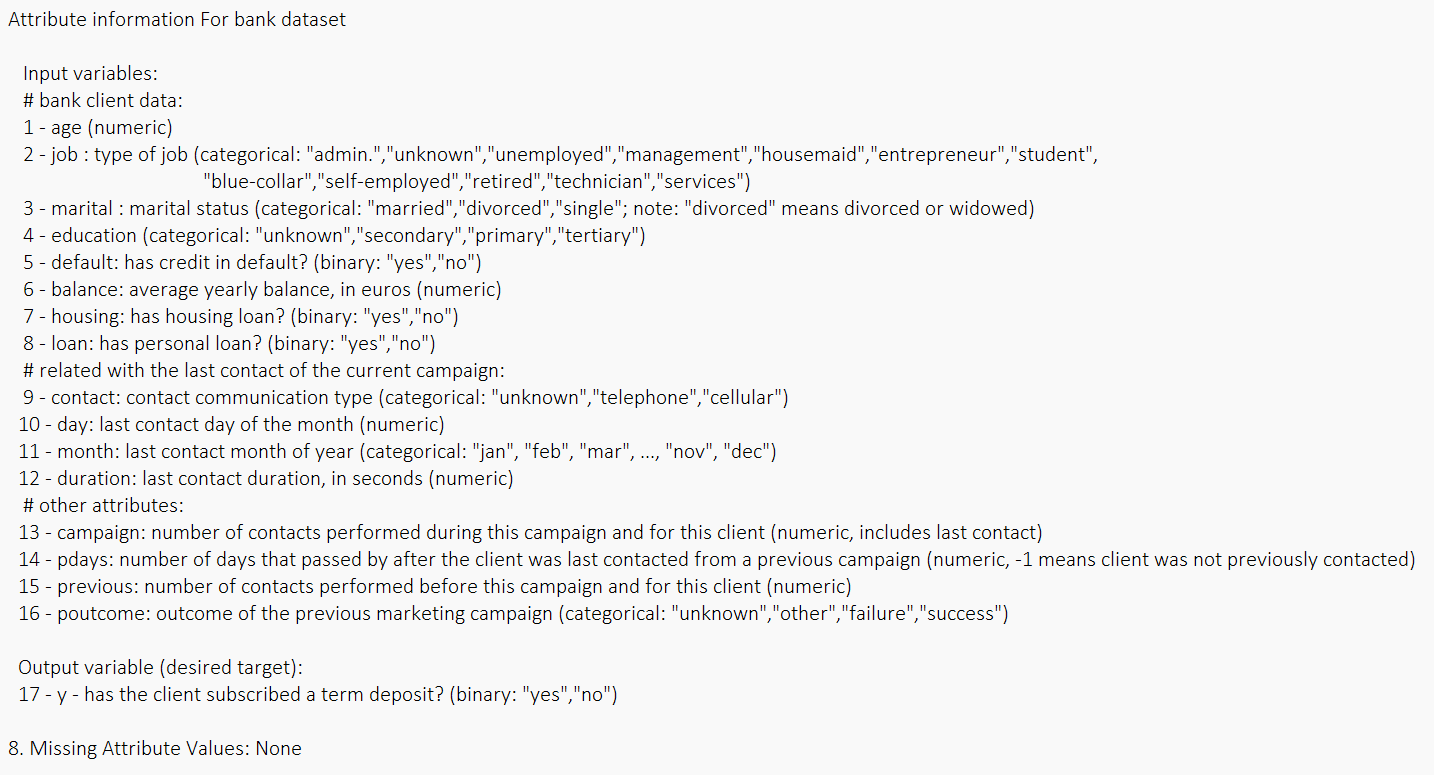

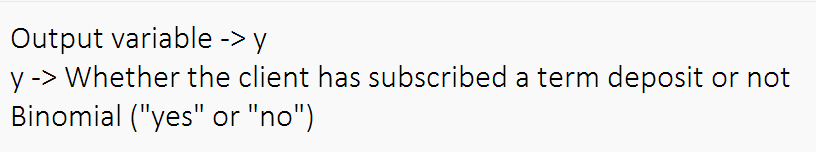

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Check what features are dependent on the y column

In [5]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


<Axes: xlabel='y', ylabel='count'>

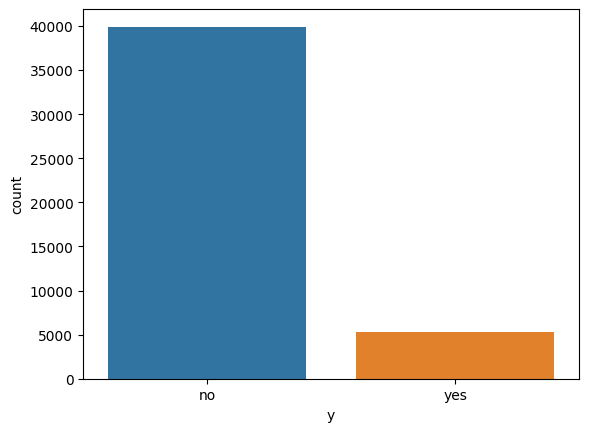

In [6]:
sns.countplot(data=df,x='y')

## Job column

In [7]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

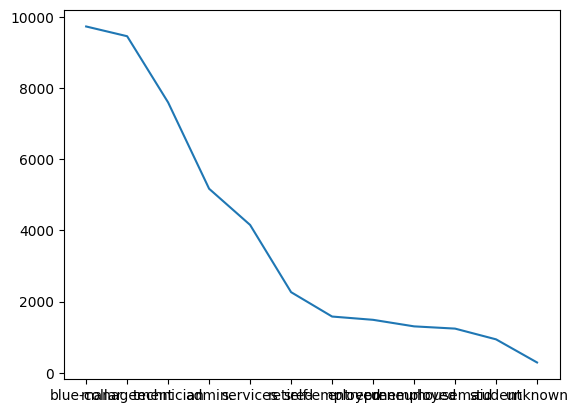

In [8]:
plt.plot(df['job'].value_counts(),data=df)

<Axes: xlabel='job'>

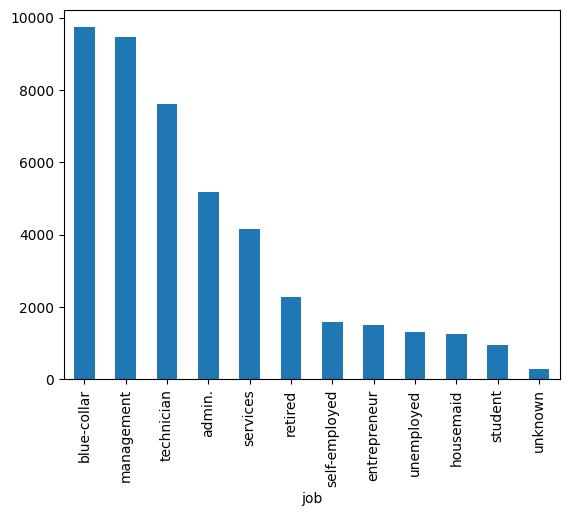

In [9]:
df['job'].value_counts().plot(kind='bar')

## Marital status

In [10]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

<Axes: xlabel='marital'>

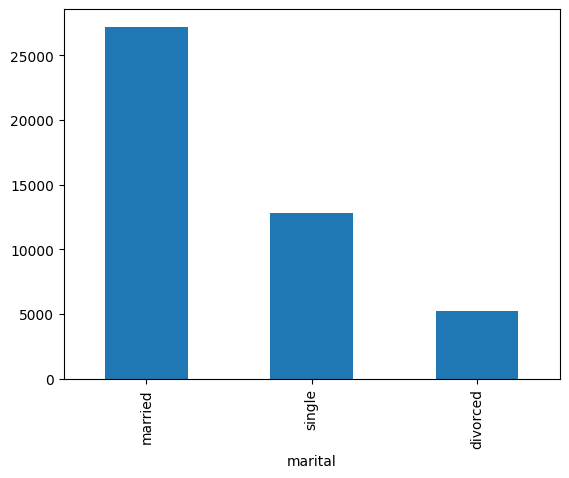

In [11]:
df['marital'].value_counts().plot(kind='bar')

<Axes: xlabel='marital', ylabel='count'>

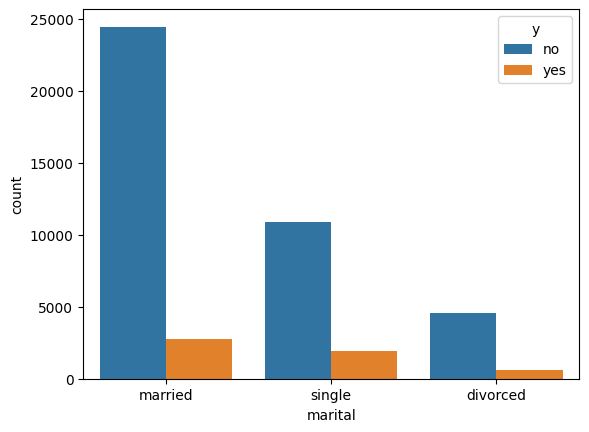

In [12]:
sns.countplot(data=df,x='marital',hue='y')

<Axes: xlabel='age', ylabel='Count'>

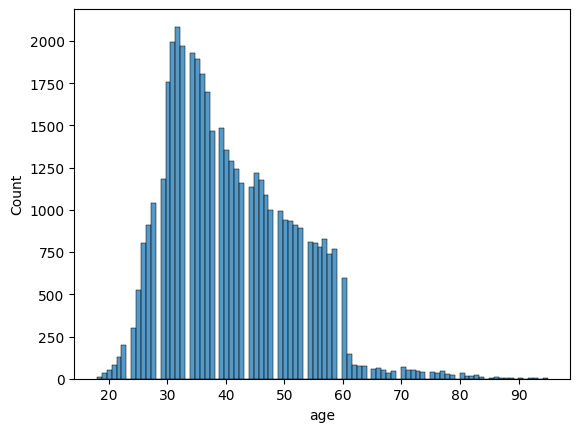

In [13]:
sns.histplot(data=df,x='age')

In [14]:
print(pd.crosstab(df['job'],df['y']))

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


<Axes: xlabel='job', ylabel='count'>

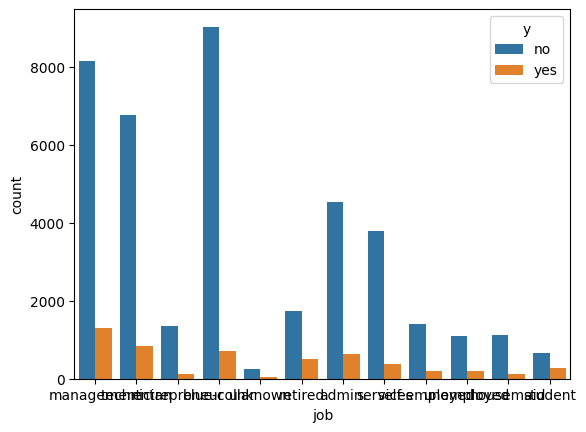

In [15]:
sns.countplot(data=df,x='job',hue='y')

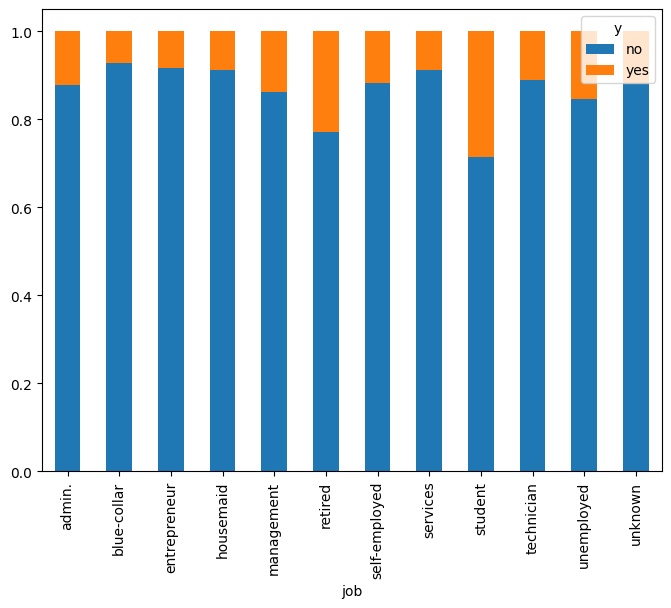

In [16]:
job_y = pd.crosstab(df['job'],df['y'])
job_plot = job_y.div(job_y.sum(1).astype(float),axis=0)

job_plot.plot.bar(stacked=True,figsize=(8,6));

Students and retired people have higher chances of subscribing to a term deposit.

In [17]:
# Marital status vs y
marital_y = pd.crosstab(df['marital'],df['y'])
marital_y

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [18]:
marital_plot = marital_y.div(marital_y.sum(1).astype(float),axis=0)
marital_plot

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


<Axes: xlabel='marital'>

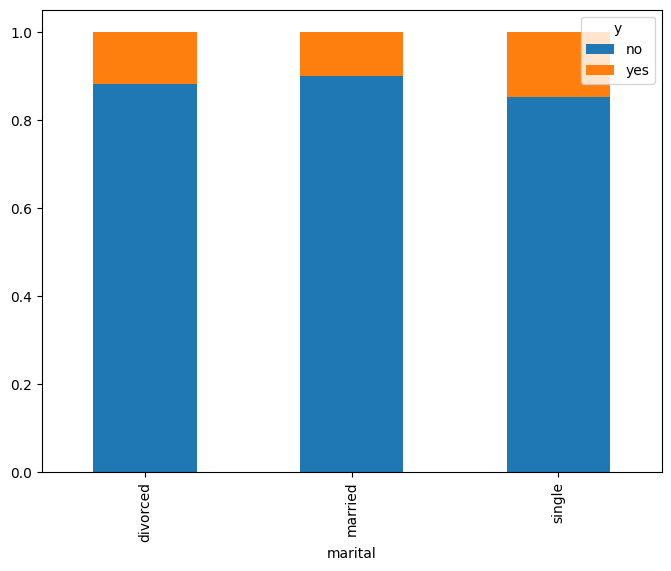

In [19]:
marital_plot.plot.bar(stacked=True,figsize=(8,6))

No major impact on subscription term deposits

In [20]:
# Default vs y
dflt = pd.crosstab(df['default'],df['y'])
dflt

y,no,yes
default,,
no,39159,5237
yes,763,52


In [21]:
dflt_plot = dflt.div(dflt.sum(1).astype(float),axis=0)
dflt_plot

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


<Axes: xlabel='default'>

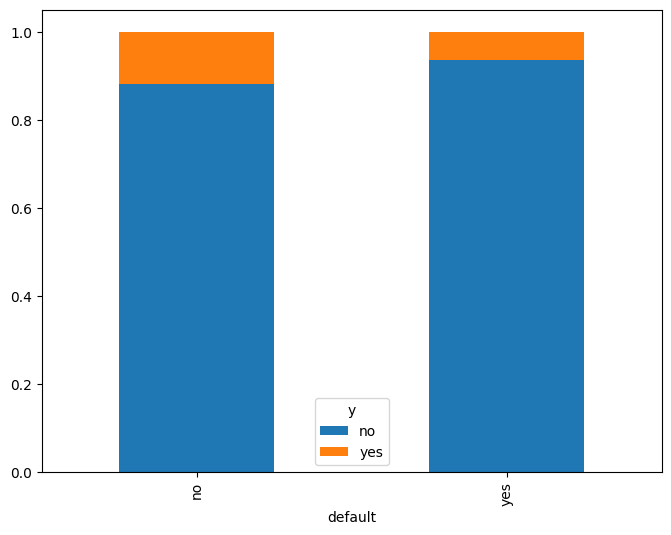

In [22]:
dflt_plot.plot.bar(stacked=True,figsize=(8,6))

Clients who haven't subscribed previously have higher chances of taking a subscription.

In [23]:
df['y'].replace('no',0,inplace=True)
df['y'].replace('yes',1,inplace=True)
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

<Axes: xlabel='education'>

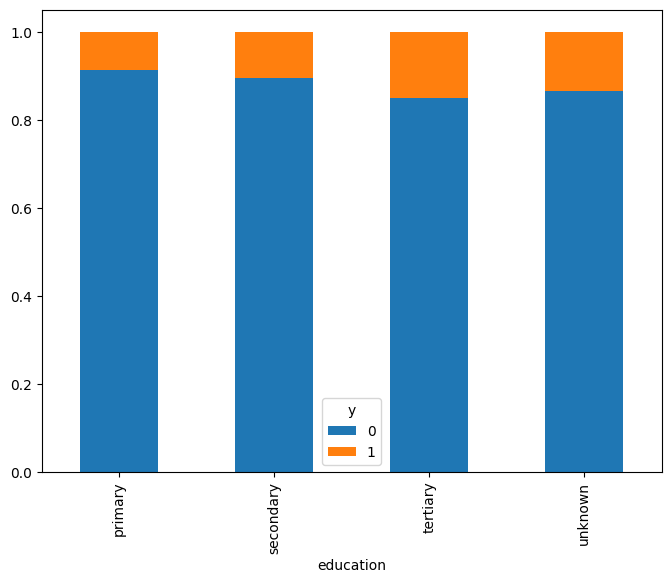

In [24]:
# Education vs y
edu = pd.crosstab(df['education'],df['y'])
edu_norm = edu.div(edu.sum(1).astype(float),axis=0)
edu_norm.plot.bar(stacked=True,figsize=(8,6))

No major dependency

<Axes: xlabel='housing'>

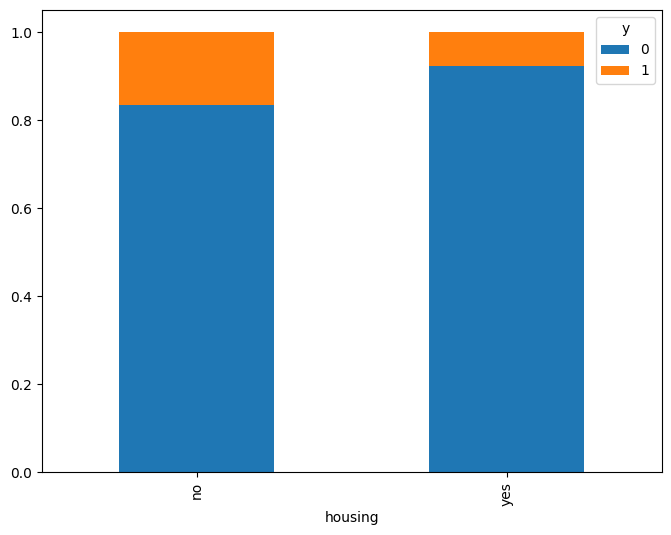

In [25]:
# Housing vs y
housing = pd.crosstab(df['housing'],df['y'])
housing = housing.div(housing.sum(1).astype(float),axis=0)
housing.plot.bar(stacked=True,figsize=(8,6))

People with no housing have more chances of subscribing

<Axes: xlabel='loan'>

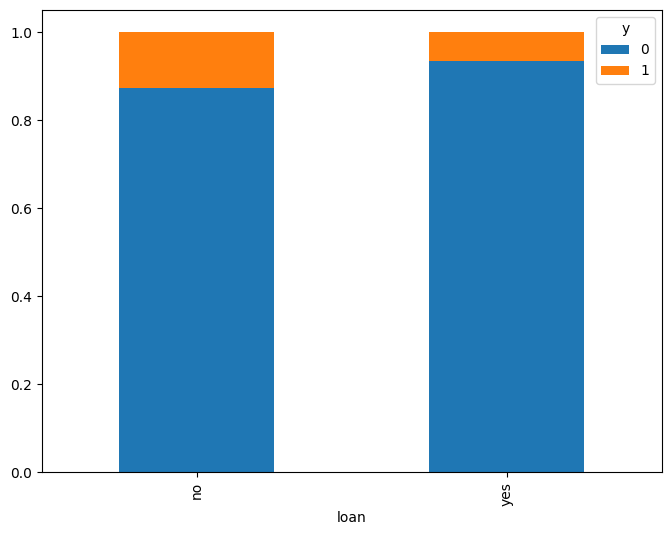

In [26]:
# Loan vs y
loan = pd.crosstab(df['loan'],df['y'])
loan = loan.div(loan.sum(1).astype(float),axis=0)
loan.plot.bar(stacked=True, figsize=(8,6))

<Axes: xlabel='contact'>

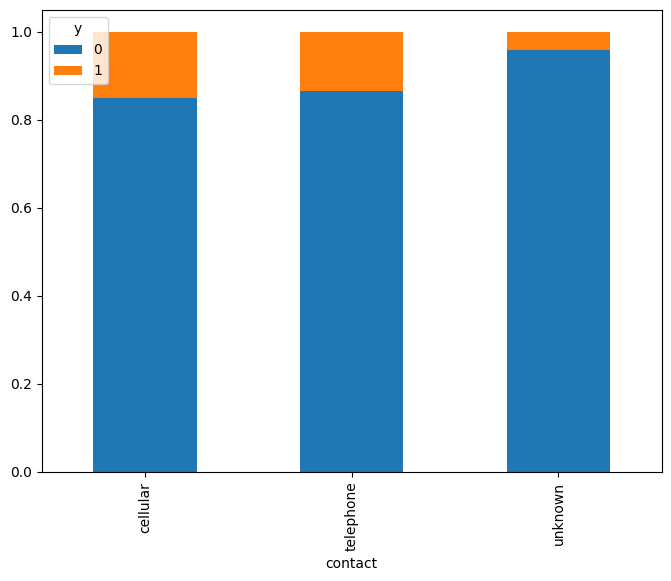

In [27]:
#Contact vs y
contacted = pd.crosstab(df['contact'],df['y'])
contacted = contacted.div(contacted.sum(1).astype(float),axis=0)
contacted.plot.bar(stacked=True,figsize=(8,6))

People contacted via cellular and telephone have more chances of subscribing

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [29]:
# Correlation matrix
df1 = df.drop(columns=['job','marital','education','contact','month','poutcome'])

In [30]:
df1['loan'].replace('no',0,inplace=True)
df1['loan'].replace('yes',1,inplace=True)
df1['housing'].replace('no',0,inplace=True)
df1['housing'].replace('yes',1,inplace=True)
df1['default'].replace('no',0,inplace=True)
df1['default'].replace('yes',1,inplace=True)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [31]:
# Correlation matrix
df1.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


<Axes: >

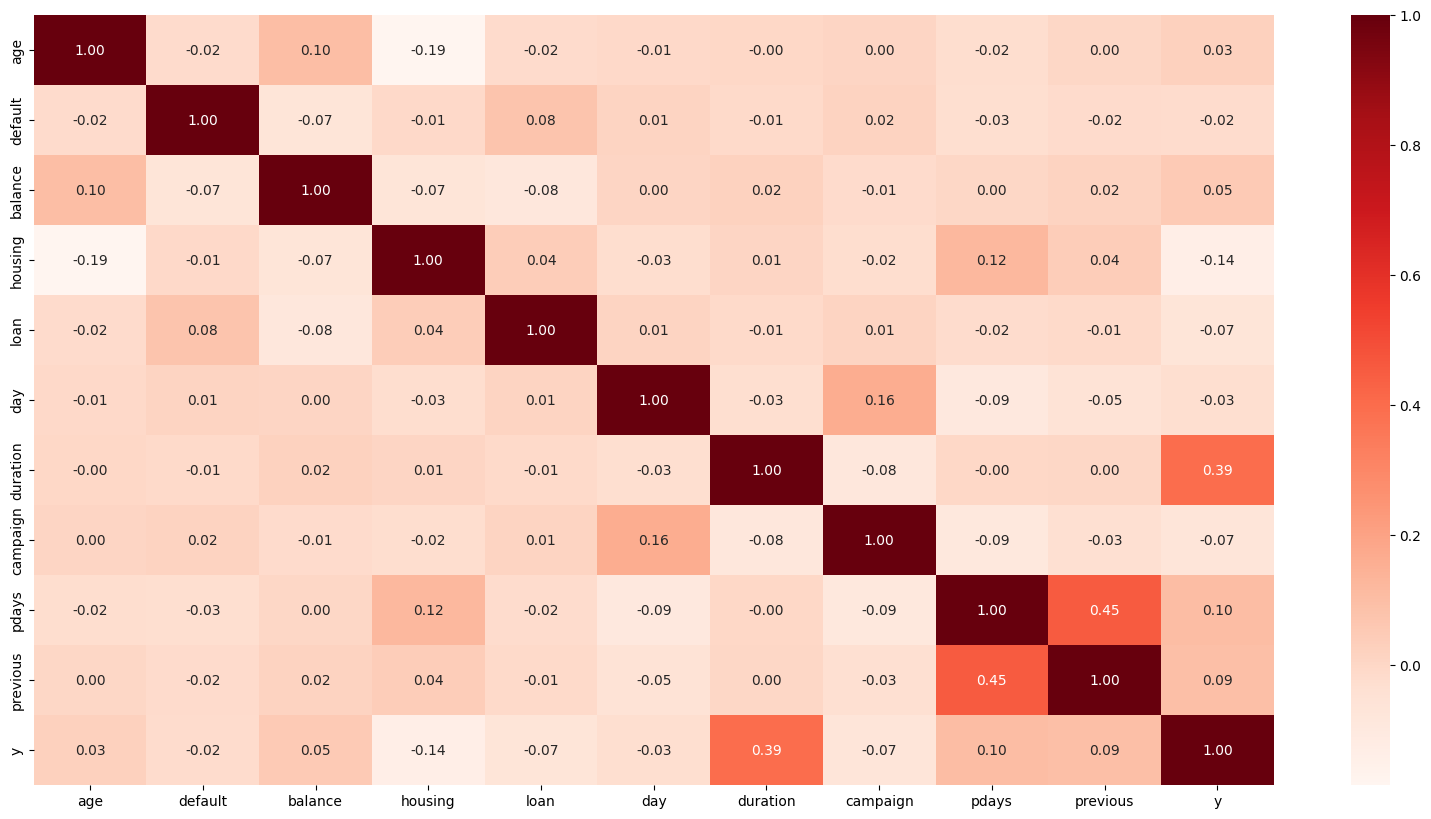

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='Reds')

Duration of call is highly correlated with the target column.

# Model building

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lg = LogisticRegression()

In [35]:
lg

LogisticRegression()

In [36]:
y = df1['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [37]:
x = df1.iloc[:,:-1]
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,58,0,2143,1,0,5,261,1,-1,0
1,44,0,29,1,0,5,151,1,-1,0
2,33,0,2,1,1,5,76,1,-1,0
3,47,0,1506,1,0,5,92,1,-1,0
4,33,0,1,0,0,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0
45207,71,0,1729,0,0,17,456,2,-1,0
45208,72,0,5715,0,0,17,1127,5,184,3
45209,57,0,668,0,0,17,508,4,-1,0


In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [40]:
lg.coef_

array([[-2.85253511e-02, -3.01192193e-02,  1.90153327e-05,
        -1.03593217e+00, -2.79736637e-01, -1.97647741e-02,
         3.58060509e-03, -3.98186250e-01,  3.27798053e-03,
        -6.85204134e-02]])

In [41]:
xtest.head(2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
3776,40,0,580,1,0,16,192,1,-1,0
9928,47,0,3644,0,0,9,83,2,-1,0


In [42]:
lg.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
ypred = lg.predict(xtest)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
confusion_matrix(ytest,ypred)

array([[7804,  148],
       [ 879,  212]], dtype=int64)

This is in the form of TN, FP, FN, TP

In [46]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



**As precision and recall are very high, the model will perform very good**